<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Multivariate_Logistic_Regression_for_Health_Risk_Factors_in_the_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

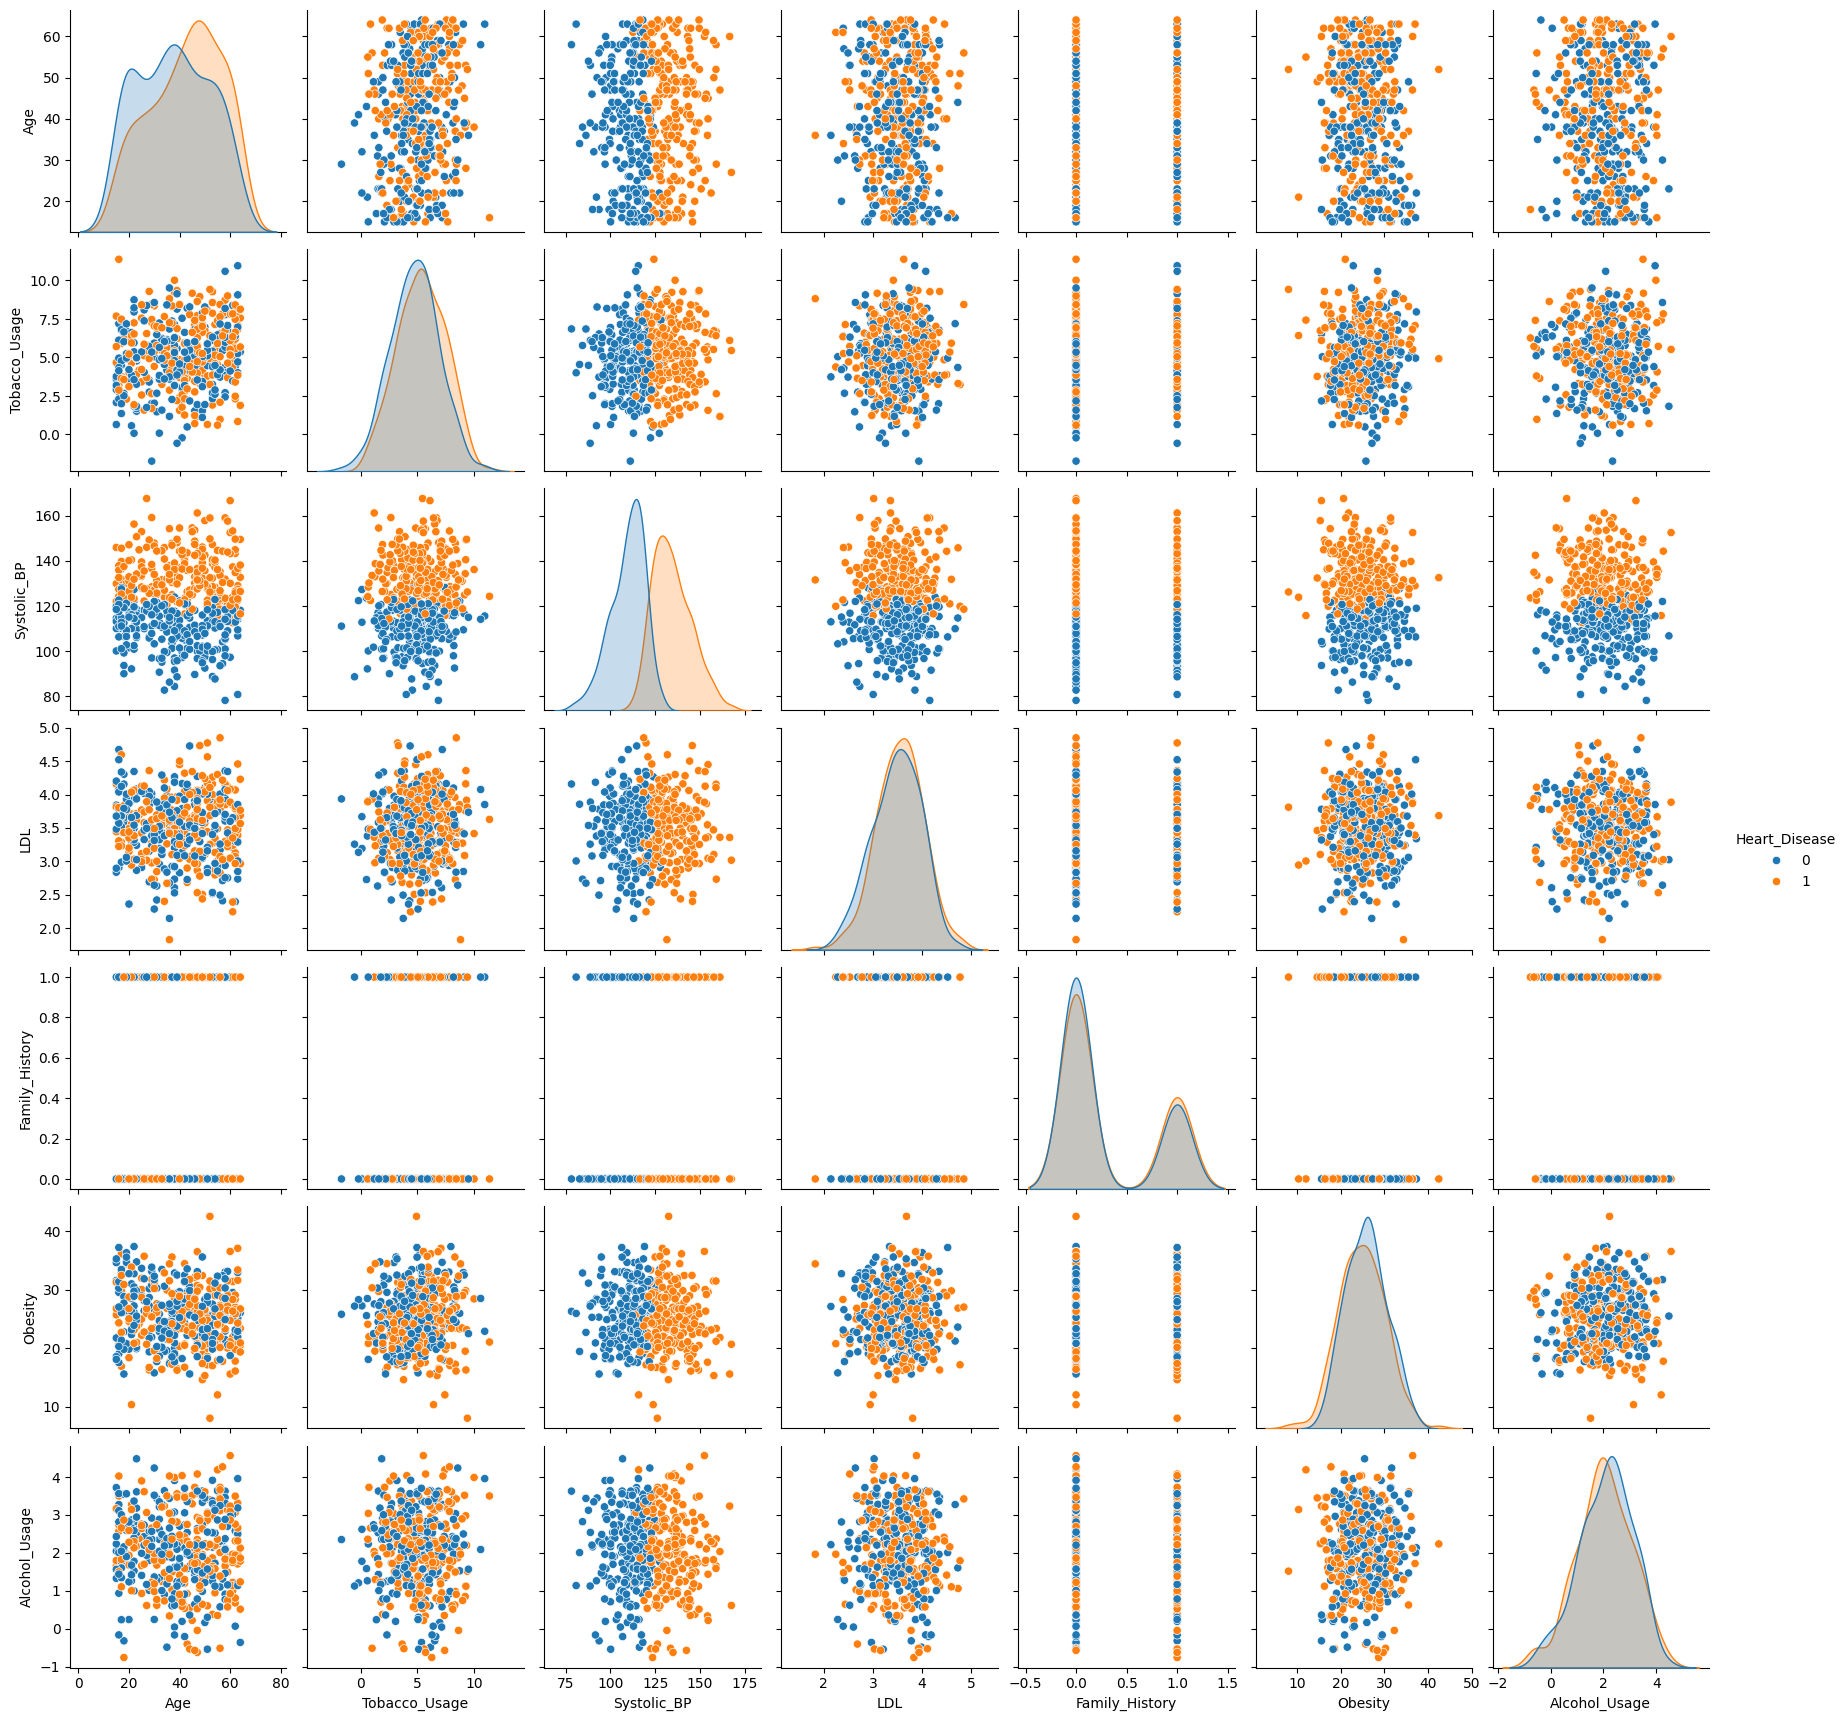

Optimization terminated successfully.
         Current function value: 0.108030
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:                  462
Model:                          Logit   Df Residuals:                      454
Method:                           MLE   Df Model:                            7
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.8441
Time:                        23:29:09   Log-Likelihood:                -49.910
converged:                       True   LL-Null:                       -320.23
Covariance Type:            nonrobust   LLR p-value:                1.452e-112
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -98.6467     14.892     -6.624      0.000    -127.834     -69.459
Age             

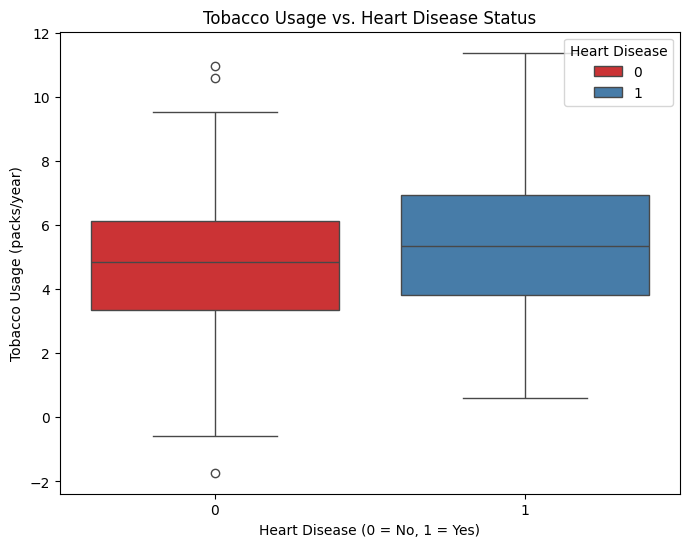

'\nThrough this analysis, I learned that certain factors such as age, tobacco usage, systolic blood pressure, LDL, and family history have significant contributions to the likelihood of heart disease. The logistic regression model provided coefficients, standard errors, z statistics, and p-values that helped me identify which predictors mattered the most. I noticed correlations between variables, such as age and tobacco use, influencing the interpretation of coefficients. This project reinforced my understanding of multivariate logistic regression as a tool for exploring complex health datasets.\n'

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate dataset for heart disease risk factors
np.random.seed(42)
n_samples = 462  # Total number of subjects

# Generate synthetic data for predictors and outcome
age = np.random.randint(15, 65, n_samples)  # Age between 15 and 64
tobacco_usage = np.random.normal(5, 2, n_samples)  # Average tobacco usage in packs/year
systolic_bp = np.random.normal(120, 15, n_samples)  # Systolic blood pressure
ldl = np.random.normal(3.5, 0.5, n_samples)  # Low-density lipoprotein cholesterol
family_history = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # 0: No, 1: Yes
obesity = np.random.normal(25, 5, n_samples)  # Body mass index
alcohol_usage = np.random.normal(2, 1, n_samples)  # Alcohol consumption in units/day

# Generate binary outcome (heart disease status)
default_rate = (
    0.03 * age + 0.1 * tobacco_usage + 0.2 * systolic_bp + 0.3 * ldl +
    0.5 * family_history - 0.1 * obesity - 0.05 * alcohol_usage +
    np.random.normal(0, 0.5, n_samples)
)

heart_disease = (default_rate > np.median(default_rate)).astype(int)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Tobacco_Usage': tobacco_usage,
    'Systolic_BP': systolic_bp,
    'LDL': ldl,
    'Family_History': family_history,
    'Obesity': obesity,
    'Alcohol_Usage': alcohol_usage,
    'Heart_Disease': heart_disease
})

# Visualize the pairwise relationships between variables
sns.pairplot(data, hue='Heart_Disease', diag_kind='kde')
plt.show()

# Perform multivariate logistic regression
X = data[['Age', 'Tobacco_Usage', 'Systolic_BP', 'LDL', 'Family_History', 'Obesity', 'Alcohol_Usage']]
y = data['Heart_Disease']
X = sm.add_constant(X)  # Add intercept

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display model summary
print(result.summary())

# Visualize the relationship between tobacco usage and heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart_Disease', y='Tobacco_Usage', data=data, hue='Heart_Disease', palette="Set1")
plt.title("Tobacco Usage vs. Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Tobacco Usage (packs/year)")
plt.legend(title="Heart Disease", loc="upper right")
plt.show()

# Interpretation
"""
Through this analysis, I learned that certain factors such as age, tobacco usage, systolic blood pressure, LDL, and family history have significant contributions to the likelihood of heart disease. The logistic regression model provided coefficients, standard errors, z statistics, and p-values that helped me identify which predictors mattered the most. I noticed correlations between variables, such as age and tobacco use, influencing the interpretation of coefficients. This project reinforced my understanding of multivariate logistic regression as a tool for exploring complex health datasets.
"""
